<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/RF_Tungkub_RS_%26_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estimasi ETo dengan Algoritma Random Forest**

Data Masukan : Suhu dan Radiasi Matahari


In [23]:
#import library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
#Reading Dataset dalam format data Excel
df = pd.read_excel('/content/Tungkub_Hourly_PM_New.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()


,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2023-02-13 12:00:02,2023,44,12,29.312,70.219,1,438.1,-0.23786,1.023978,...,1260.465453,193.254701,33.560402,69,247.741287,0.891869,0.364028,h,0.12,m
3,2023-02-13 13:00:02,2023,44,13,29.676,69.697,1.67,375.6,-0.23786,1.023978,...,1256.371338,115.721378,28.75582,69,221.961341,0.799061,0.326147,rc day,69.00,s/m
4,2023-02-13 14:00:02,2023,44,14,28.11,78.695,1.34,323.1,-0.23786,1.023978,...,1252.723978,144.219926,24.783312,69,179.529946,0.646308,0.263799,rc night,690.00,s/m
5,2023-02-13 15:00:02,2023,44,15,26.588,76.712,1,214.4,-0.23786,1.023978,...,1245.78727,193.254701,16.314088,69,121.028726,0.435703,0.177838,Latitude,-8.00,degrees
6,2023-02-13 16:00:02,2023,44,16,27.767,76.011,0.67,210.6,-0.23786,1.023978,...,1242.785238,288.439852,16.06366,69,119.201398,0.429125,0.175153,Longitude,115.00,degrees


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 2 to 5562
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5561 non-null   object 
 1   Year         5561 non-null   object 
 2   DOY          5561 non-null   object 
 3   Time         5561 non-null   object 
 4   T            5561 non-null   object 
 5   RH           5561 non-null   object 
 6   U            5561 non-null   object 
 7   Rs           5561 non-null   object 
 8   Dec          5561 non-null   object 
 9   dr           5561 non-null   object 
 10  t.c.         5561 non-null   object 
 11  angh         5561 non-null   object 
 12  cos θ        5561 non-null   object 
 13  Rs pot       5561 non-null   object 
 14  TRA          5561 non-null   float64
 15  Rb           5561 non-null   object 
 16  es           5561 non-null   object 
 17  e            5561 non-null   object 
 18  VPD          5561 non-null   object 
 19  Rn    

In [26]:
#Mengubah Tipe data menjadi Float
df[['Rs', 'RH', 'U', 'T', 'ET']] = df[['Rs', 'RH', 'U', 'T', 'ET']].astype(float)

In [27]:
df[['Rs', 'RH', 'U', 'T', 'ET']].describe()

,Rs,RH,U,T,ET
count,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000
mean,193.424510,81.053563,0.400599,26.378555,0.155387
std,303.738622,12.268428,0.285843,3.545059,0.246353
min,0.600000,39.576000,0.200000,19.124000,-0.009454
25%,0.600000,70.335000,0.200000,23.671000,0.000704
50%,4.400000,85.489000,0.330000,25.665000,0.004404
75%,265.600000,91.156000,0.670000,29.269000,0.212025
max,1276.900000,99.261000,2.670000,35.789000,1.022930


In [28]:
#Input features dan target variabel
target_variable = df['ET']
features_variable = df['Rs' and 'T']

X = features_variable #independent variabel
y = target_variable #dependent variabel

In [29]:
#Split dataset untuk training dan testing dataset dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Jumlah data untuk training dan testing
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(3892,) (1669,) (3892,) (1669,)


In [30]:
#Random Forest Model
model = RandomForestRegressor(n_estimators = 150)

In [31]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
#Fitting model
rf = model.fit(X_train_reshaped, y_train)

Model Evaluation

In [32]:
#Prediction on Training Dataset
ytrain_pred = rf.predict(X_train_reshaped)

#Nilai R Squared pada Data Training
print('Nilai R_Squared (Training): %.2f'% r2_score(y_train, ytrain_pred))
#Nilai MSE pada Data Training
print('Nilai MSE (Training): %.2f'% mean_squared_error(y_train, ytrain_pred))
#Nilai RMSE pada Data Training
print('The RMSE (Training): %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

Nilai R_Squared (Training): 0.77
Nilai MSE (Training): 0.01
The RMSE (Training): 0.12


In [33]:
#Prediction on Testing Dataset
ytest_pred =rf.predict(X_test_reshaped)

#Nilai R Squared pada Data Testing
print('Nilai R_Squared (Testing): %.2f'% r2_score(y_test, ytest_pred))
#Nilai MSE pada Data Testing
print('Nilai MSE (Testing): %.2f'% mean_squared_error(y_test, ytest_pred))
#Nilai RMSE pada Data Testing
print('Nilai RMSE (Testing): %.2f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))

Nilai R_Squared (Testing): 0.63
Nilai MSE (Testing): 0.02
Nilai RMSE (Testing): 0.15


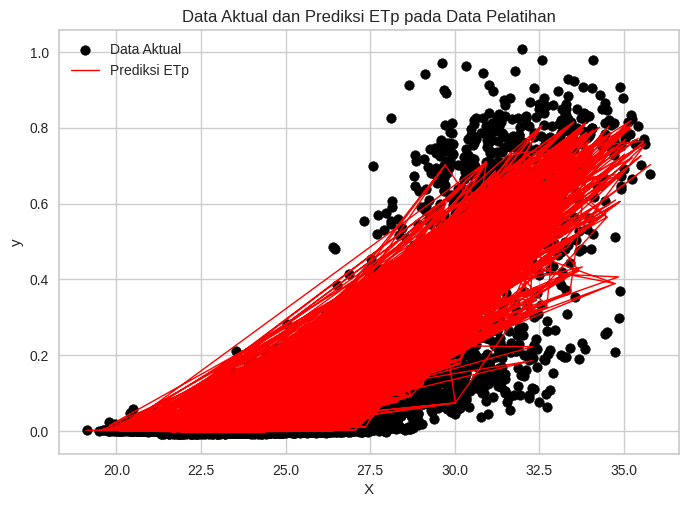

In [34]:
import matplotlib.pyplot as plt
##???
# Plot data aktual dan prediksi pada data pelatihan
plt.scatter(X_train, y_train, color='black', label='Data Aktual')
plt.plot(X_train, ytrain_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.title('Data Aktual dan Prediksi ETp pada Data Pelatihan')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

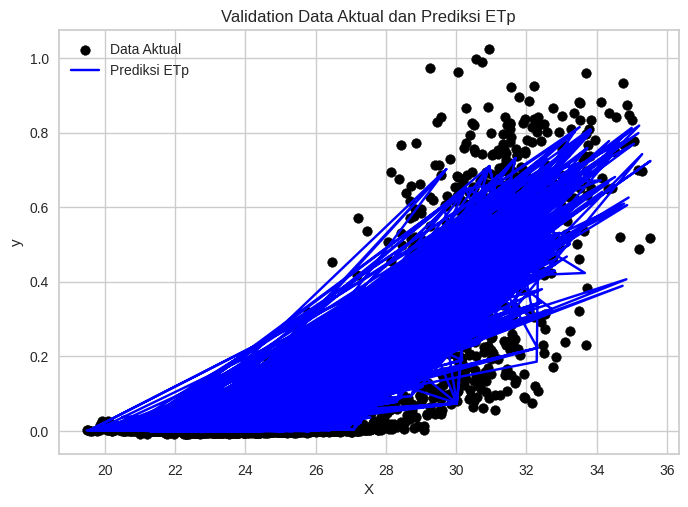

In [40]:
##??
#Plot pada data test
plt.scatter(X_test, y_test, color = 'black', label = 'Data Aktual')
plt.plot(X_test, ytest_pred, color='blue', label='Prediksi ETp')
plt.title('Validation Data Aktual dan Prediksi ETp')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

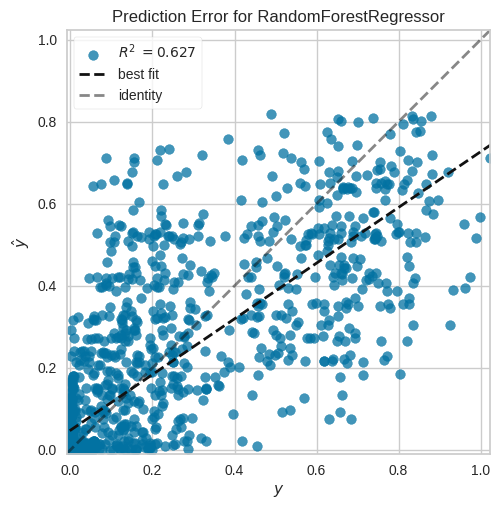

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:
#Plotting Prediction Error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf)
visualizer.fit(X_train_reshaped, y_train)
visualizer.score(X_test_reshaped, y_test)
visualizer.poof()

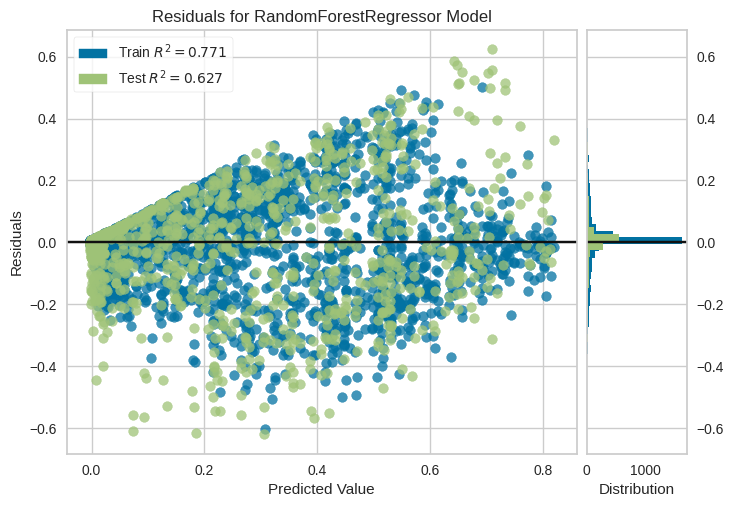

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [37]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rf)
visualizer.fit(X_train_reshaped, y_train)
visualizer.score(X_test_reshaped, y_test)
visualizer.poof()

In [38]:
# K Fold Cross Validation
from sklearn.model_selection import cross_val_score
#Training Model CV
score_train = cross_val_score(rf, X_train_reshaped, y_train, scoring ='neg_mean_squared_error', cv = 10)
print(score_train)
#The mean score
print('Mean CV (Train):', np.mean(score_train))

[-0.02196408 -0.02389845 -0.02381191 -0.02250211 -0.02114562 -0.02465356
 -0.01540803 -0.02295084 -0.02081859 -0.01963453]
Mean CV (Train): -0.021678774028118894


In [39]:
#Testing Model CV
score_test = cross_val_score(rf, X_test_reshaped, y_test, scoring ='neg_mean_squared_error', cv = 10)
print(score_test)
#The mean score test
print('Mean CV (Test)', np.mean(score_test))

[-0.01653705 -0.02808916 -0.0378759  -0.03218618 -0.0244089  -0.03475461
 -0.02888962 -0.02908454 -0.02955248 -0.02888282]
Mean CV (Test) -0.029026126028596215
